# Introduction

Predict North America video game sales with a dataset from [Kaggle](https://www.kaggle.com/gregorut/videogamesales).

Personal goal is to use Python for data cleaning and classical machine learning, so there will be a good amount of notes per method used.

*Note: Codes may also come from other sources for practice/workflow

## What else do I hope to achieve from this?

Develop a stronger understanding in experimental design before developing prediction models. It's the idea of the laying out of a detailed experimental plan in advance of doing the experiment.
- How should we best represent splitting the data?
- How do we control the environment to best mimic a real-world study?

Develop a stronger understanding using Python functions and methods in the entire modeling lifecycle after data preparation. 
- What's best practice? 
- Should I create a bunch of wrapper functions to automate everything? 
- Should I start building in a granular form first? 
- Do I understand the algorithms being implemented?

## Dataset

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Note: This could be another project where I could modify the scraper for practice.

__Feature Descriptions:__

1. Rank - Ranking of overall sales

1. Name - The games name

1. Platform - Platform of the games release

1. Year - Year of the game's release

1. Genre - Genre of the game

1. Publisher - Publisher of the game

1. NA_Sales - Sales in North America (in millions)

1. EU_Sales - Sales in Europe (in millions)

1. JP_Sales - Sales in Japan (in millions)

1. Other_Sales - Sales in the rest of the world (in millions)

1. Global_Sales - Total worldwide sales.


## Framing the problem

Can you predict North America video game sales?

## Method of Evaluation

Since we are predicting a price, this will be a regression problem. We will use linear algorithms like linear regression, ridge regression, lasso regression, elastic-net regression and non-linear algorithms like random forest, gradient boosting, and a stacking method.

The evaluation metric we will be using is __Root-Mean-Squared_error (RMSE)__ between actual sales and the predicted sales. RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

__Why RMSE over mean-squared-error (MAE)?__ Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

Here's a picture of the RMSE formula below.

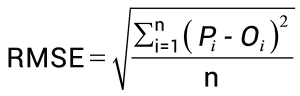

In [2]:
from IPython.display import Image
url = 'https://gisgeography.com/wp-content/uploads/2014/07/rmse-formula1-300x96.png'
Image(url, width=300, height=350)

## Modeling Framework

1. Framing the problem
    - What are we trying to solve?
    - Understand what's the problem here and ask questions
    - What type of problem are we trying to solve?
        - Classification, regression, etc.
        - Types of algorithms specified for possible use
2. Collecting relevant information and data
    - What type of data do we have?
        - Databases, scraped data, API data, etc.
    - What other data requirements are there?
    - What is considered a success for this problem?
    - What libraries do we need?
        - How do we know our models are good?
3. Process for analysis (preprocessing & cleaning)
    - How does the data structure and distribution look like?
    - Is the data usable right away? 
    - Can the data be plotted?
    - What changes do we need to make the data usable if it's not already?
4. Exploratory data analysis
    - How does the data look like?
    - Are there any patterns?
        - Identify any summary statistics, plotting, counting, etc.
    - Familiarize yourself with the data
    - Basically the step to help you get to know the data better
5. Feature engineering (applied machine learning)
    - Can we create more data (features) that will be helpful for our models?
    - "... re-working of predictors is more of an art, requiring the right tools and experience to find better predictor representations" - Max Kuhn
6. Statistical analysis
    - Univariate, bivariate, multivariate analysis
        - Analysis of a single feature
        - Analysis of two features and their relationships
        - Analysis of data collected on more than one dependent variable and their relationships (PCA, PLS)
7. Modeling & Scoring
    - Splitting the data into train and test sets
        - Always make sure you have a completely separate data set to test your final model on after hyperparameter tuning and training has been done
        - Think about your experimental design beforehand so that you minimize unrelated sources of variation and reduce as much data leakage (if any) as possible
    - Standardizing the data to be on similar scales
    - Create baseline & pre-tuned models
    - Cross-validate the models
    - Hyperparameter tuning
    - Create cross-validated tuned models using best hyperparameters
    - Compare models
8. Evaluation
    - How accurate are the models?
        - Are the models overfitting or underfitting?
    - What evaluation metric are we using?
    - Is the final model good enough?
    - Which features are important?
    - Iterate steps with feature selection
9. Extra
    - Create train vs. cross-validating learning curves per size
10. Ending Notes
    - Notes on algorithms used, models created, ways to improve performances

## Collecting relevant data

In [11]:
# Set directory
import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'

# Move to directory with the data
os.chdir(path)

# Check
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv',
 '09-house-regression-env.db',
 '09-house-test.csv',
 '09-house-train.csv',
 '10-vgsales.csv']

## Import libraries

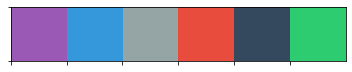

In [66]:
# Toolbox
import pandas as pd
import pandas_profiling
import numpy as np
import random
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy import stats

# Misc
import warnings
warnings.filterwarnings(action='ignore')

# Preset data display
pd.options.display.max_seq_items = 5000
pd.options.display.max_rows = 5000

# Set notebook palette
flatui = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))
# Favorite color for use: #34995e

## Import data

In [59]:
data = pd.read_csv('10-vgsales.csv')

## Preprocess & Clean

Let's take a look at the data and see how it's structured. We will also be lookin for missing values as well to get an idea how complete the data is and create some summary diagnostics/plots. The less missing values the better and if they are missing, why are they missing?

In summary, some of the questions we try to answer here:
- Are we able to use the data right away?
- Are there any nul values?
- How clean is the data?

Here are some basic functions we can use below.

In [60]:
'''

Some functions to start off with:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train.fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''
print('')

In [61]:
# Top 5 rows
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [62]:
# Shape of the data
data.shape

(16598, 11)

## Splitting data

Since the goal of looking at this dataset is to predict video game sales, we need to have at least 1 train set and 1 test set so we will split the data here. We are splitting the data at the very beginning, because we attempt to remove the possibility of data leakage as much as we can when developing predictive models is the goal here.

__Data leakage__ - when information from outside the training dataset is used to create the model

Data leakage can cause you to create overly optimistic if not completely invalid predictive models because additional information can allow the model to learn or know something that it otherwise would not know, which will in turn invalidate the estimated performance of the model being constructed. - [MLM Link](https://machinelearningmastery.com/data-leakage-machine-learning/)

In other words, you know information of your test beforehand and then attempt to train (study & learn) on that same test and then validate your train results (time studying and what you have learned) on a "new" test data (the same dataset you learned from). So did you really learn something?

Techniques to minimize data leakage when building models
1. Perform data preparation within your cross-validation folds
    - One solution for this, we can re-prep the data within your cross validation folds including tasks like feature selection, outlier removal, encoding, feature scaling and projection methods for dimensionality reduction, and more
2. Hold back a validation dataset for final sanity check of your developed models
    - This approach splits your training dataset into 2 sets (1 train and 1 validation) and then save the validation dataset for use after the models have been created
    - Once created, validate the performance on the validation set 

Common data preparation issues
1. Normalizing or standardization your entire dataset and then estimating the performance of your model using cross-validation
    - When this happens, the test data's information is being added into the training information so when we start testing, it's not a true representation of unknown data
    - An example is when you attempt to rescale the data on the same distribution of data, which includes the test set, and then use those values as inputs in your model

## Train and test sets

In [69]:
# Split dependent and independent variables
y = data['NA_Sales']
X = data.drop(['NA_Sales'], axis=1)

# Shuffle the data and then split the data into train and test sets
# Method 1: Shuffling - most recommended method to save time; drawback includes list ordering is lost
# Method 2: Sampling - creates a new shuffled list and returns it rather than disturbing the order of original list
from sklearn.utils import shuffle
shuffled_data = shuffle(data).reset_index()

In [86]:
# Split the data into train and test sets
print('75% of the data size = ', (round(len(data)*0.75, 0)))
train = shuffled_data[0:12448]
test = shuffled_data[12448:len(shuffled_data)]

75% of the data size =  12448.0


In [89]:
# Get data shape, info, columns, & dimensions
print ("*"*45)
print('********** train shape: ' + str(train.shape) + '*'*10)
print (train.info())
print ("*"*43)
print('********** test shape: ' + str(test.shape) + '*'*10)

*********************************************
********** train shape: (12448, 12)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12448 entries, 0 to 12447
Data columns (total 12 columns):
index           12448 non-null int64
Rank            12448 non-null int64
Name            12448 non-null object
Platform        12448 non-null object
Year            12245 non-null float64
Genre           12448 non-null object
Publisher       12404 non-null object
NA_Sales        12448 non-null float64
EU_Sales        12448 non-null float64
JP_Sales        12448 non-null float64
Other_Sales     12448 non-null float64
Global_Sales    12448 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB
None
*******************************************
********** test shape: (4150, 12)**********


We split the data early on using the train_test_split() function with 75% of the data going into the training set and 25% of the data going into the test set. Then we combined the y and X train data together so we have the full train population.

Now, we will not touch the test data for any reason unless we are scaling or creating new features. Only scale and create features based on the training set.

### Some methods to combine/add dataframe data
If we were combining two dataframes (appending rows), we could use a concat() method:
- pd.concat([dataframe_1, dataframe_2], ignore_index=True)

If we were combining two dataframes (appending columns), we could use a merge() method:
- pd.merge(dataframe_1, dataframe_2, left_on='id', right_on='id')
- pd.merge(dataframe_1, dataframe_2, on='id', how='left')

If we wanted to add an additional row of data, we could use an append() method:
- new_row_data = pd.Series([1,2,3,4], index=['id', 'col1', col2'...]]
- dataframe_1.append(new_row_data, ignore_index=True)

## Null values

Are there any null values? Let's show column names with any null data values.

In [91]:
# Get nulls
null_cols = pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
null_cols_pct = pd.DataFrame(round(train.isnull().sum().sort_values(ascending=False)*100/len(train), 2), columns=['Null Data Pct'])

# Combine the two dataframes (axis=1) with column names using the keys parameter
null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

# Get null features only
all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

# Print
print('There are', len(all_nulls), 'columns with missing values.')
all_nulls

There are 2 columns with missing values.


,Null Data Count,Null Data Pct
Year,203,1.63
Publisher,44,0.35


## Plotting the nulls

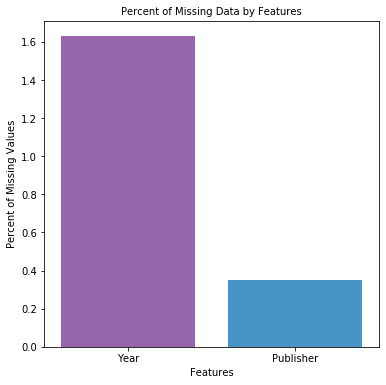

In [133]:
# Create figure space
fig = plt.figure(figsize=(6, 6))

# Create bar plot
fig = sns.barplot(x=all_nulls.index,
                  y='Null Data Pct',
                  data=all_nulls)

# Set plot features (seaborn we use set methods vs. plt methods for matplotlib)
plt.xticks(rotation='0')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of Missing Values', fontsize=10)
plt.title('Percent of Missing Data by Features', fontsize=10)
plt.show()

Looks like we have a total of 2 features that have missing values. We can try to explore the features to see why it would have nulls in the first place, but for the sake of this notebook, we will just remove them for now. Also, the plot may be a little misleading because the bars are very large but there really is only less than 2 percent of missing data so we will rescale it in the next plot.

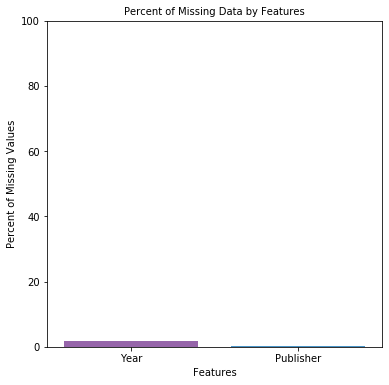

In [134]:
# Create figure space
fig = plt.figure(figsize=(6, 6))

# Create bar plot
fig = sns.barplot(x=all_nulls.index,
                  y='Null Data Pct',
                  data=all_nulls)

# Set plot features (seaborn we use set methods vs. plt methods for matplotlib)
plt.xticks(rotation='0')
plt.ylim(0,100)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of Missing Values', fontsize=10)
plt.title('Percent of Missing Data by Features', fontsize=10)
plt.show()

Compare the differences. Data visualization is a crucial soft skill to have as we want to present the data to be as accurate and compelling as possible for our audience to perceive the idea of what we are attempting to inform them of. Hopefully our audience would be more engaged in this after seeing the second plot and will remember the size gap between the two. In this case, there isn't a lot of missing values based on this plot above. 

### Data storytelling 
Data storytelling can be a whole notebook by itself on best practices on what can be done to craft a more compelling story behind our analyses to uncover insights and drive action. Remember that all the work we do is really just a subset of a giant interdisciplinary field and for me, this subset involves behavioral economics (we are all irrational), psychology (behavioral, neuroscience), decision science, and much more!

Take a look at some of these links about data storytelling/data visualization:
- [Storytellingwithdata](http://www.storytellingwithdata.com/)
- [Data Storytelling as an essential skill](https://www.forbes.com/sites/brentdykes/2016/03/31/data-storytelling-the-essential-data-science-skill-everyone-needs/#6e2ba8e652ad)
- [Few examples](https://twooctobers.com/blog/8-data-storytelling-concepts-with-examples/)